<a href="https://colab.research.google.com/github/ragazzo-br/0x-examples/blob/main/Btc_Eth_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance numpy pandas statsmodels pykalman matplotlib



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 6.4 MB/s eta 0:00:00


In [ ]:
import yfinance as yf

tickers = ['BTC-USD', 'ETH-USD']
data = yf.download(tickers, start='2023-08-01', end='2024-08-01')['Adj Close']
print(data.head())


[*********************100%%**********************]  2 of 2 completed

Ticker           BTC-USD      ETH-USD
Date                                 
2023-08-01  29675.732422  1871.792114
2023-08-02  29151.958984  1839.089722
2023-08-03  29178.679688  1835.136475
2023-08-04  29074.091797  1827.712891
2023-08-05  29042.126953  1834.987915


In [ ]:
data.columns = ['BTC', 'ETH']


In [ ]:
!pip install statsmodels


In [ ]:
# Calcular o coeficiente beta usando regressão linear
X = sm.add_constant(data['ETH'])
model = sm.OLS(data['BTC'], X).fit()
beta = model.params['ETH']

In [ ]:
spread = data['BTC'] - beta * data['ETH']

In [ ]:
spread_mean = spread.rolling(window=30).mean()
spread_std = spread.rolling(window=30).std()

In [ ]:
z_score = (spread - spread_mean) / spread_std

In [ ]:
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

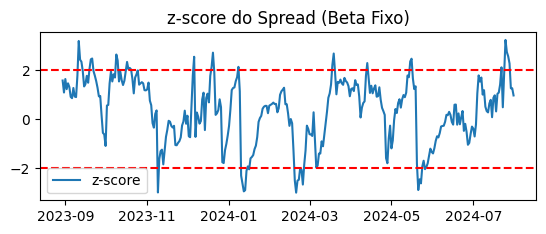

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(z_score, label='z-score')
plt.axhline(2, color='r', linestyle='--')
plt.axhline(-2, color='r', linestyle='--')
plt.title('z-score do Spread (Beta Fixo)')
plt.legend()